In [37]:
%cd C:\Users\John\Documents\Research\ML_Gravity\

C:\Users\John\Documents\Research\ML_Gravity


In [38]:
import os, sys
os.getcwd()#os.path.pwd
os.path.exists("Data\\Dataframes\\sh_stats_moon_Brillouin.data")

True

In [39]:
import os

os.environ["PATH"] += os.pathsep + "C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v10.1\\extras\\CUPTI\\lib64"

import copy
import pickle
import sys
import time

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import tensorflow as tf
#import tensorflow_model_optimization as tfmot
from GravNN.CelestialBodies.Asteroids import Bennu, Eros
from GravNN.CelestialBodies.Planets import Earth, Moon
from GravNN.Networks.Configs.Default_Configs import *
from GravNN.Networks.Configs.Fast_Configs import *
from GravNN.GravityModels.Polyhedral import Polyhedral, get_poly_data
from GravNN.GravityModels.SphericalHarmonics import (SphericalHarmonics,
                                                     get_sh_data)
from GravNN.Networks import utils
from GravNN.Networks.Analysis import Analysis
from GravNN.Networks.Callbacks import CustomCallback
from GravNN.Networks.Compression import (cluster_model, prune_model,
                                         quantize_model)
from GravNN.Networks.Data import generate_dataset, training_validation_split
from GravNN.Networks.Model import CustomModel, load_config_and_model
from GravNN.Networks.Networks import (DenseNet, InceptionNet, ResNet,
                                      TraditionalNet)
from GravNN.Networks.Plotting import Plotting
from GravNN.Support.Grid import Grid
from GravNN.Support.transformations import (cart2sph, project_acceleration,
                                            sphere2cart)
from GravNN.Trajectories.DHGridDist import DHGridDist
from GravNN.Trajectories.ExponentialDist import ExponentialDist
from GravNN.Trajectories.GaussianDist import GaussianDist
from GravNN.Trajectories.RandomAsteroidDist import RandomAsteroidDist
from GravNN.Trajectories.RandomDist import RandomDist
from GravNN.Trajectories.FibonacciDist import FibonacciDist

from GravNN.Trajectories.ReducedGridDist import ReducedGridDist
from GravNN.Trajectories.ReducedRandDist import ReducedRandDist
from GravNN.Visualization.MapVisualization import MapVisualization
from GravNN.Visualization.VisualizationBase import VisualizationBase
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from GravNN.Networks.Activations import leaky_relu, bent_identity
from Scripts.Networks.train import train_network
from Scripts.Networks.plot import Plotting

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

# TODO: Put in mixed precision training
# from tensorflow.keras.mixed_precision import experimental as mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_policy(policy)
# print('Compute dtype: %s' % policy.compute_dtype)
# print('Variable dtype: %s' % policy.variable_dtype)


np.random.seed(1234)
tf.random.set_seed(0)

In [40]:
points = 250000
planet = Moon()
analysis_trajectories = {
    "Brillouin" : FibonacciDist(planet, planet.radius, points),
}
plot_trajectories = {
    "Brillouin" : DHGridDist(planet, planet.radius, degree=180),
}

In [3]:
def pipeline(df_file, config):
    model, config = train_network(df_file, config)

    analyzer = Analysis(model, config)
    model_id = config['id'][0]
    rse_entries = analyzer.compute_rse_stats(analysis_trajectories)
    utils.update_df_row(model_id, df_file, rse_entries)
    print(rse_entries['Brillouin_param_rse_mean'])
    print(rse_entries['Brillouin_rse_mean'])

    print(rse_entries['Brillouin_param_sigma_2_mean'])
    print(rse_entries['Brillouin_sigma_2_mean'])

    plotter = Plotting(model, config)
    plotter.plot_loss()
    plotter.plot_maps(plot_trajectories)

# Moon Results

In [31]:
df_file = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\moon_test.data'
config = get_default_moon_config()
config['epochs']  = [50000]
config['N_dist'] = [1000000]
config['N_train'] = [950000]


In [ ]:
config['layers'] = [[3, 20, 20, 20, 20, 20, 20, 20, 20, 3]]
pipeline(df_file, config)

Found existing acceleration.data at C:\Users\John\Documents\Research\ML_Gravity\GravNN\Trajectories\TrajectoryBase/../../Files/Trajectories/RandomDist/moonN_1000000_RadBounds[1738100.0, 1788100.0]/SphericalHarmonics_gggrx_1200a_sha_1000/
Found existing acceleration.data at C:\Users\John\Documents\Research\ML_Gravity\GravNN\Trajectories\TrajectoryBase/../../Files/Trajectories/RandomDist/moonN_1000000_RadBounds[1738100.0, 1788100.0]/SphericalHarmonics_gggrx_1200a_sha_2/


C:\Users\John\Documents\Research\venv\tf2env\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\John\Documents\Research\venv\tf2env\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Epoch: 0 	 Loss: 0.0047192 	 Val Loss 0.0033125 	 Time: 8.985
Epoch: 10 	 Loss: 0.0030683 	 Val Loss 0.0030784 	 Time: 1.435
Epoch: 20 	 Loss: 0.0030485 	 Val Loss 0.0030538 	 Time: 1.419
Epoch: 30 	 Loss: 0.0029805 	 Val Loss 0.0029725 	 Time: 1.419
Epoch: 40 	 Loss: 0.0027835 	 Val Loss 0.0027854 	 Time: 1.403
Epoch: 50 	 Loss: 0.0026681 	 Val Loss 0.0026592 	 Time: 1.403
Epoch: 60 	 Loss: 0.0026104 	 Val Loss 0.0026090 	 Time: 1.565
Epoch: 70 	 Loss: 0.0025598 	 Val Loss 0.0025610 	 Time: 1.410
Epoch: 80 	 Loss: 0.0025052 	 Val Loss 0.0025124 	 Time: 1.420
Epoch: 90 	 Loss: 0.0024474 	 Val Loss 0.0024545 	 Time: 1.402
Epoch: 100 	 Loss: 0.0023699 	 Val Loss 0.0023739 	 Time: 1.549
Epoch: 110 	 Loss: 0.0022840 	 Val Loss 0.0022869 	 Time: 1.402
Epoch: 120 	 Loss: 0.0022185 	 Val Loss 0.0022277 	 Time: 1.403
Epoch: 130 	 Loss: 0.0021690 	 Val Loss 0.0021820 	 Time: 1.421
Epoch: 140 	 Loss: 0.0021262 	 Val Loss 0.0021364 	 Time: 1.400
Epoch: 150 	 Loss: 0.0020933 	 Val Loss 0.0021070 	

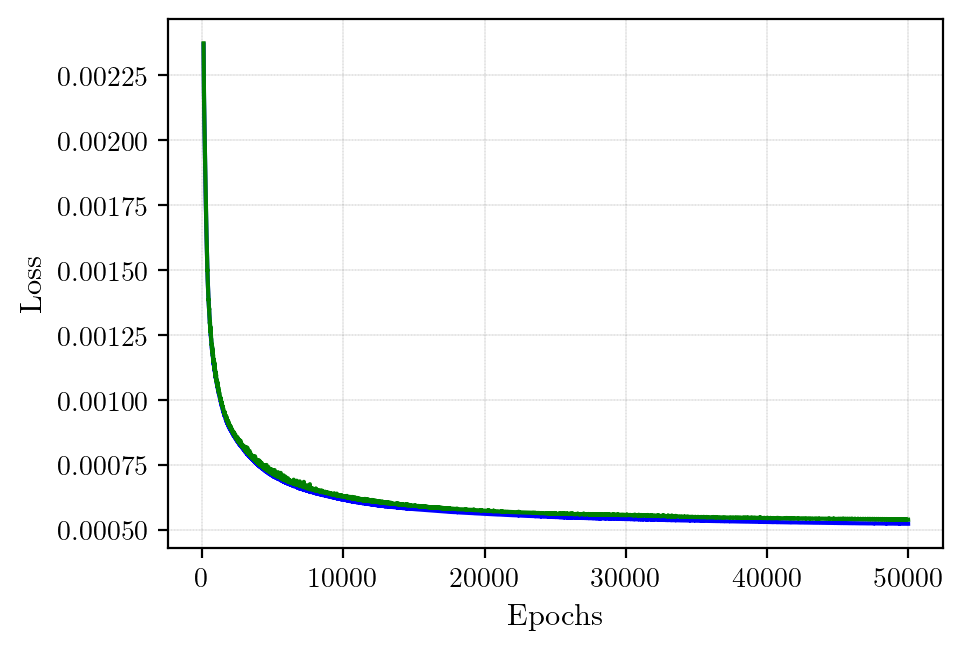

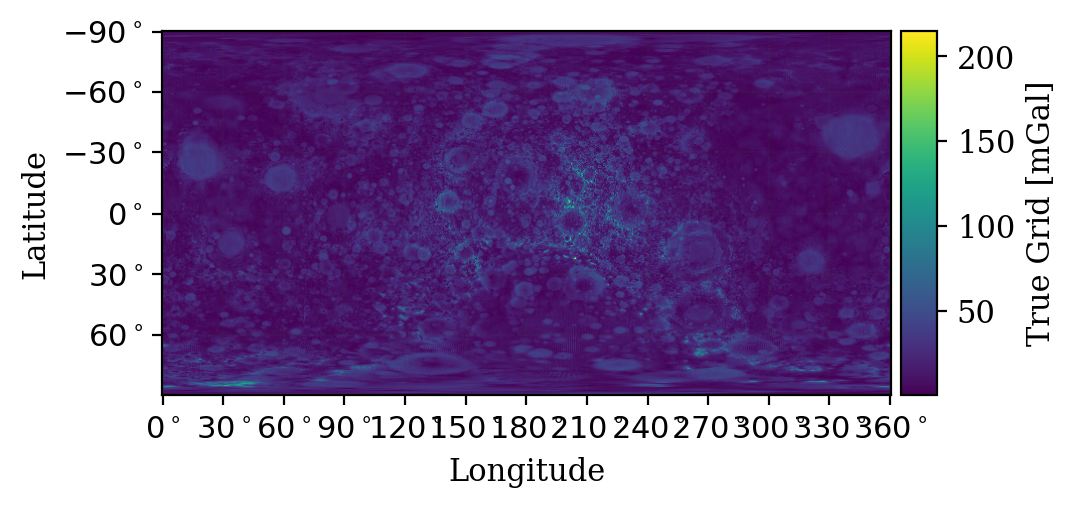

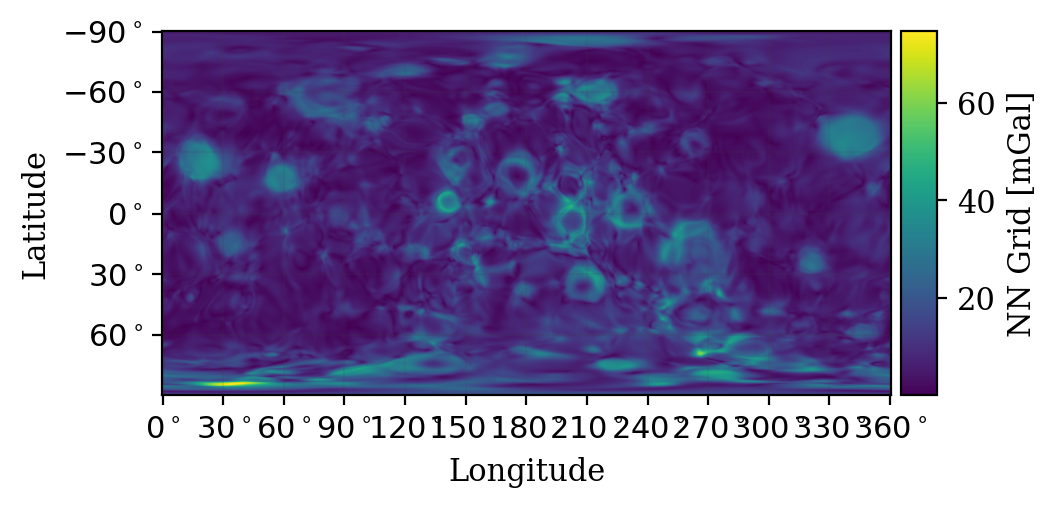

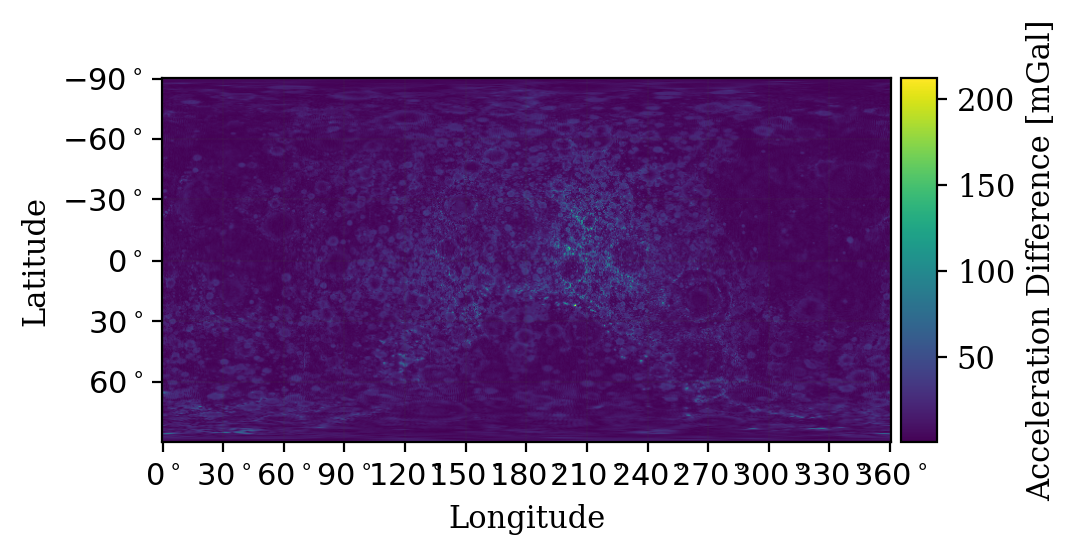

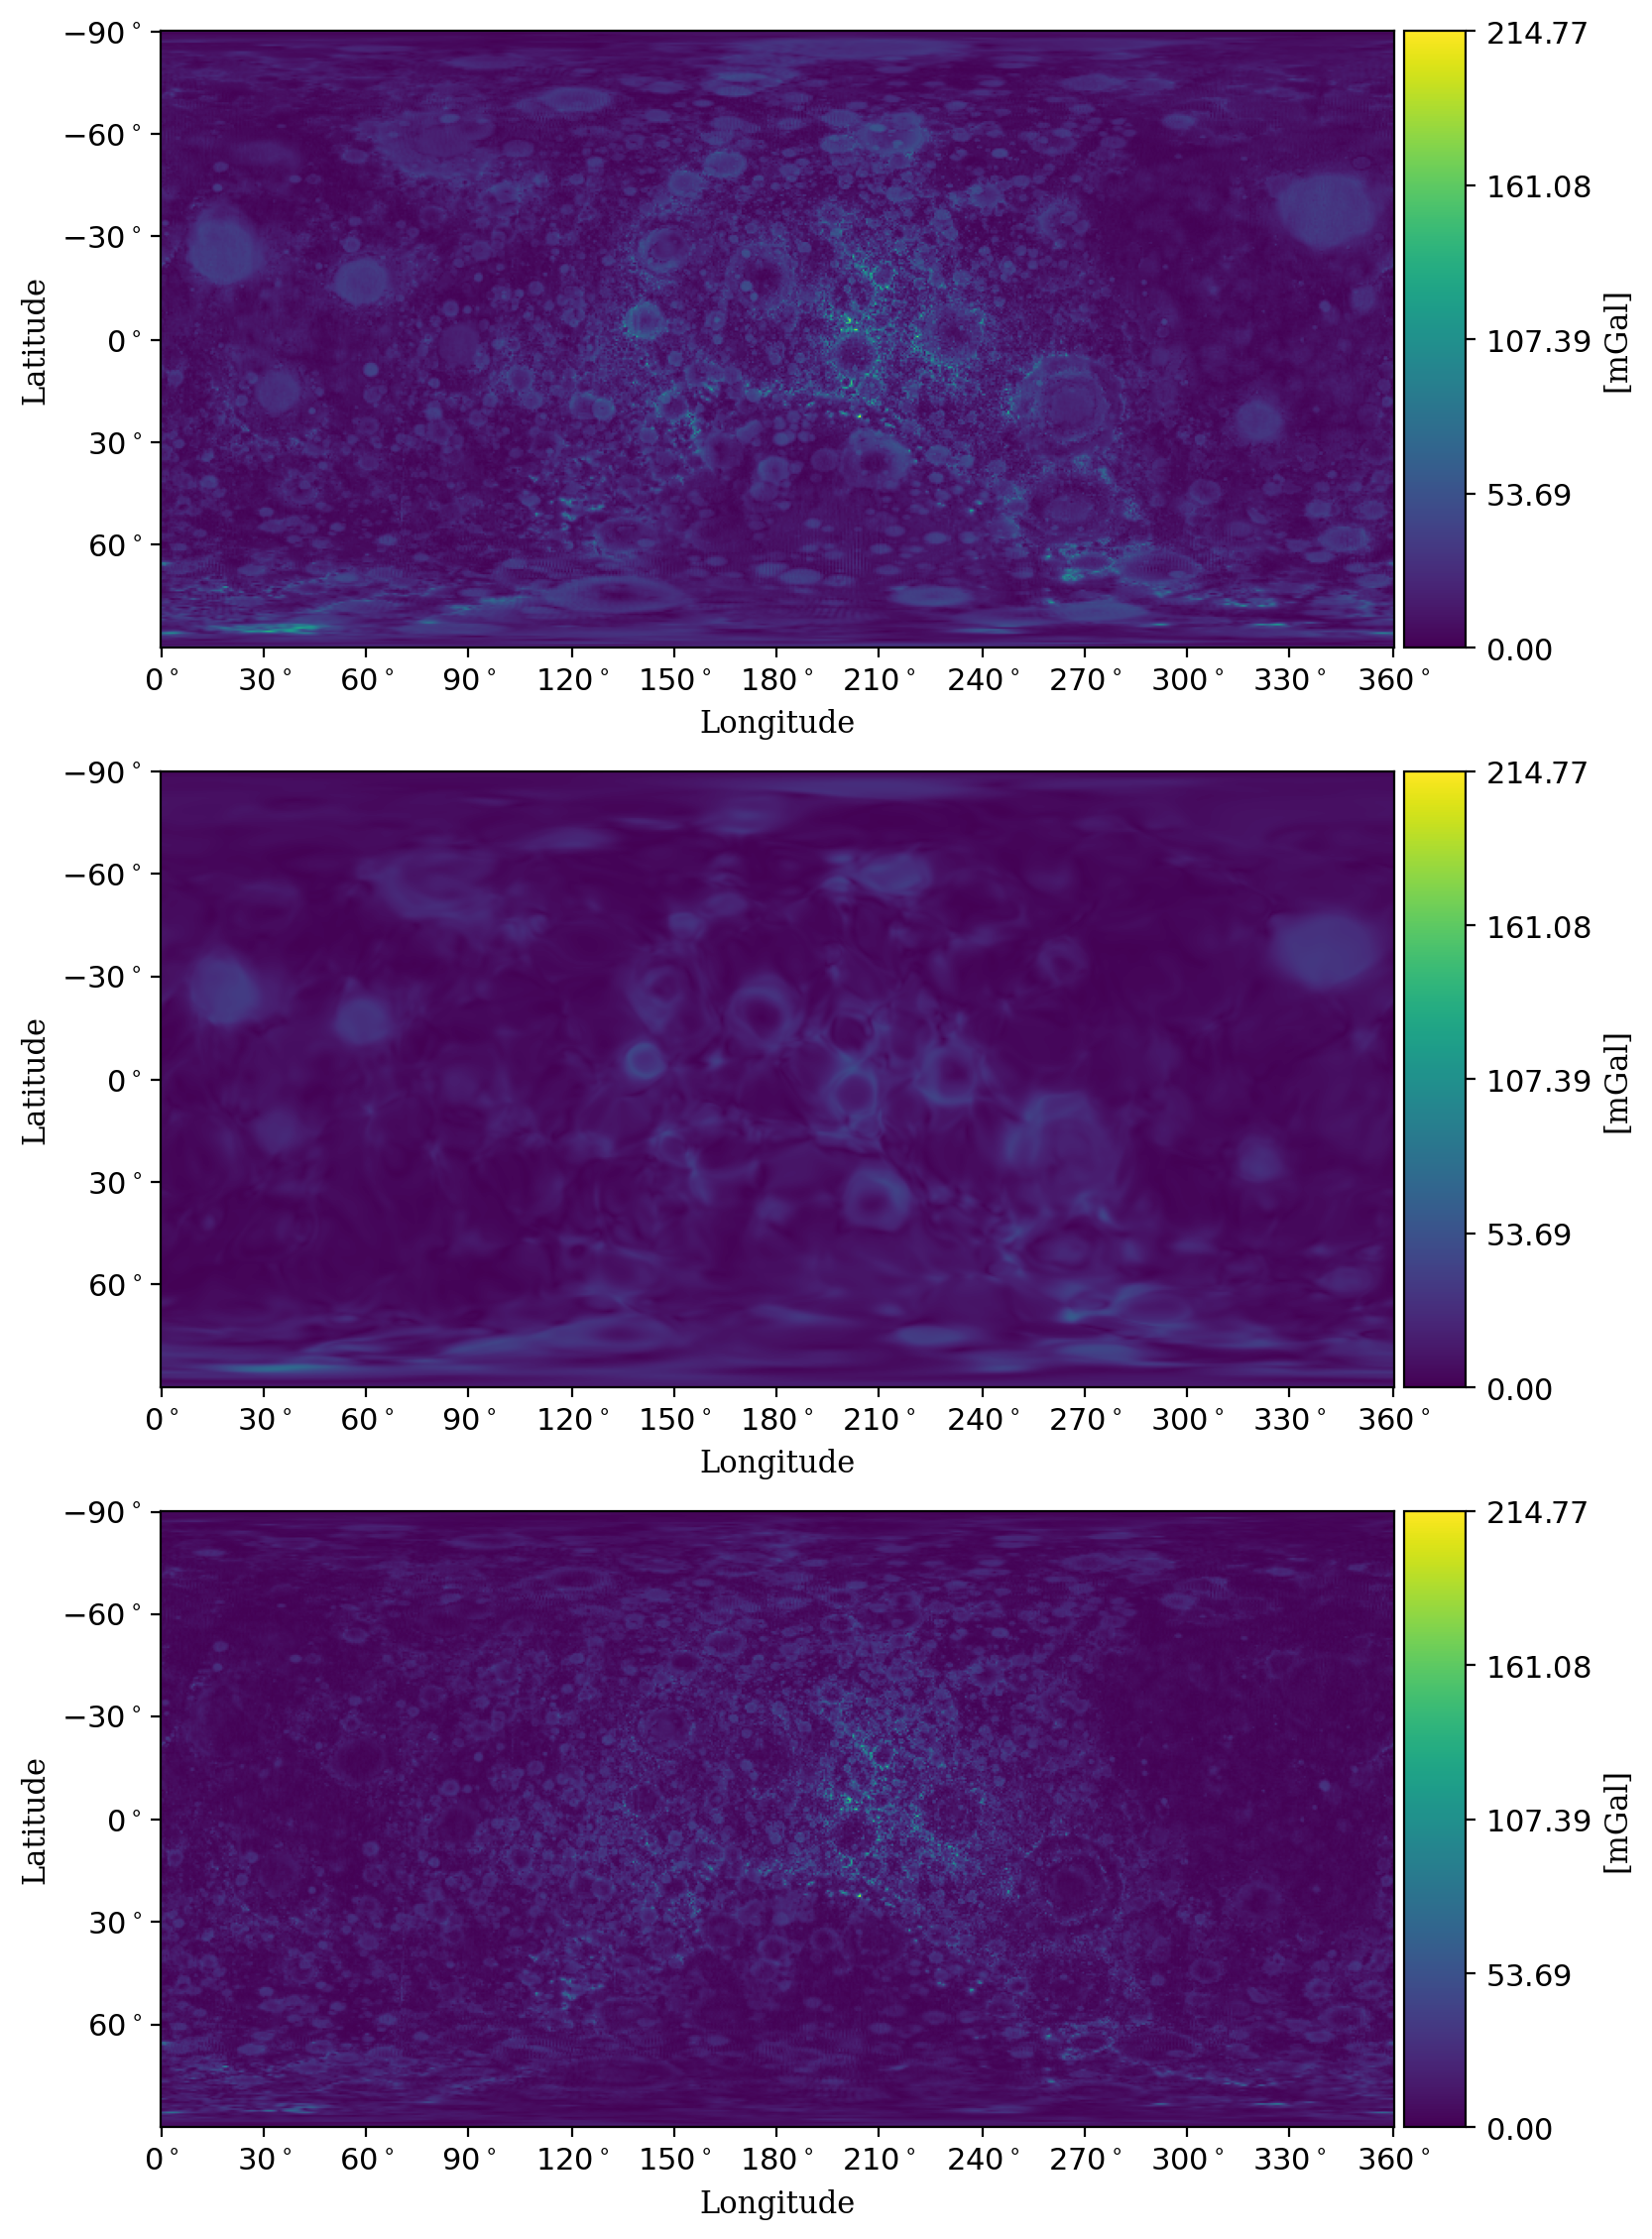

In [28]:
config['layers'] = [[3, 40, 40, 40, 40, 40, 40, 40, 40, 3]]
pipeline(df_file, config)

Found existing acceleration.data at C:\Users\John\Documents\Research\ML_Gravity\GravNN\Trajectories\TrajectoryBase/../../Files/Trajectories/RandomDist/moonN_1000000_RadBounds[1738100.0, 1788100.0]/SphericalHarmonics_gggrx_1200a_sha_1000/
Found existing acceleration.data at C:\Users\John\Documents\Research\ML_Gravity\GravNN\Trajectories\TrajectoryBase/../../Files/Trajectories/RandomDist/moonN_1000000_RadBounds[1738100.0, 1788100.0]/SphericalHarmonics_gggrx_1200a_sha_2/


C:\Users\John\Documents\Research\venv\tf2env\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\John\Documents\Research\venv\tf2env\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


Epoch: 0 	 Loss: 0.0076443 	 Val Loss 0.0036500 	 Time: 12.415
Epoch: 10 	 Loss: 0.0030850 	 Val Loss 0.0030972 	 Time: 2.167
Epoch: 20 	 Loss: 0.0030705 	 Val Loss 0.0030798 	 Time: 2.121
Epoch: 30 	 Loss: 0.0030523 	 Val Loss 0.0030911 	 Time: 2.398
Epoch: 40 	 Loss: 0.0030079 	 Val Loss 0.0030222 	 Time: 2.136
Epoch: 50 	 Loss: 0.0029040 	 Val Loss 0.0029023 	 Time: 2.143
Epoch: 60 	 Loss: 0.0027725 	 Val Loss 0.0027434 	 Time: 2.136
Epoch: 70 	 Loss: 0.0026388 	 Val Loss 0.0026199 	 Time: 2.137
Epoch: 80 	 Loss: 0.0025695 	 Val Loss 0.0025507 	 Time: 2.143
Epoch: 90 	 Loss: 0.0024954 	 Val Loss 0.0024683 	 Time: 2.137
Epoch: 100 	 Loss: 0.0023906 	 Val Loss 0.0023996 	 Time: 2.135
Epoch: 110 	 Loss: 0.0022781 	 Val Loss 0.0022764 	 Time: 2.142
Epoch: 120 	 Loss: 0.0021965 	 Val Loss 0.0021955 	 Time: 2.136
Epoch: 130 	 Loss: 0.0021294 	 Val Loss 0.0021252 	 Time: 2.136
Epoch: 140 	 Loss: 0.0020799 	 Val Loss 0.0020800 	 Time: 2.143
Epoch: 150 	 Loss: 0.0020533 	 Val Loss 0.0020444 

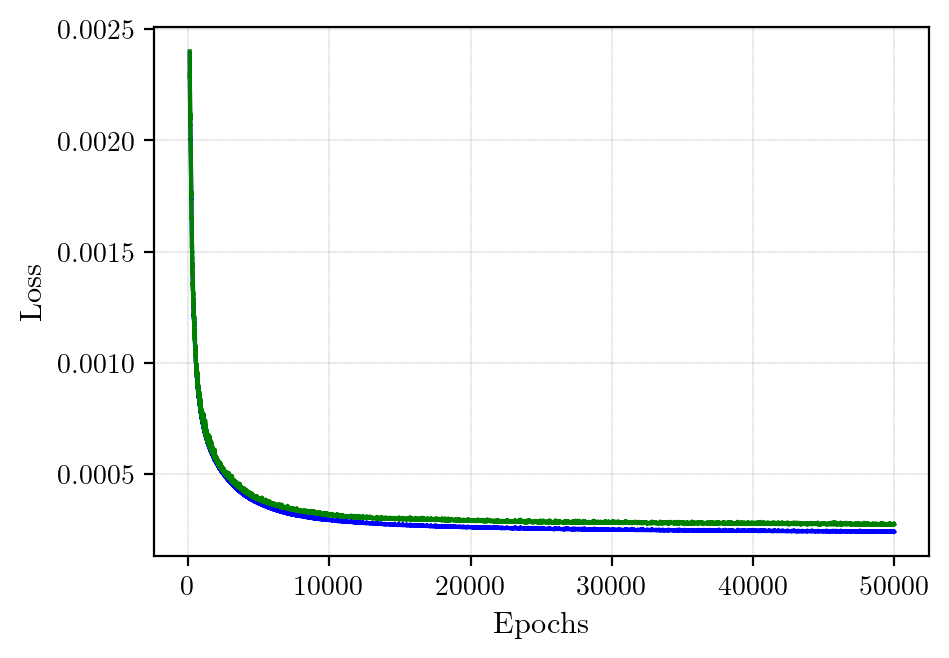

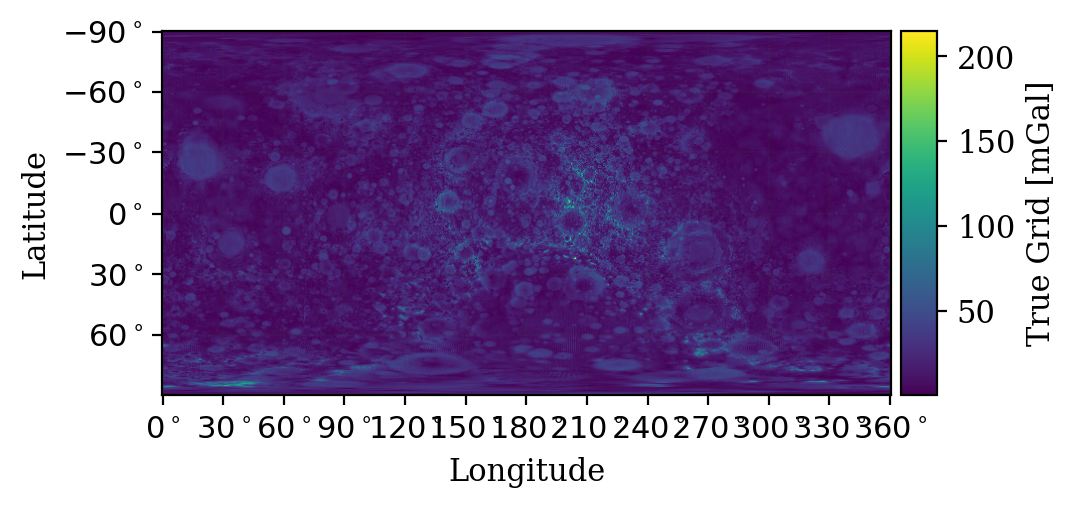

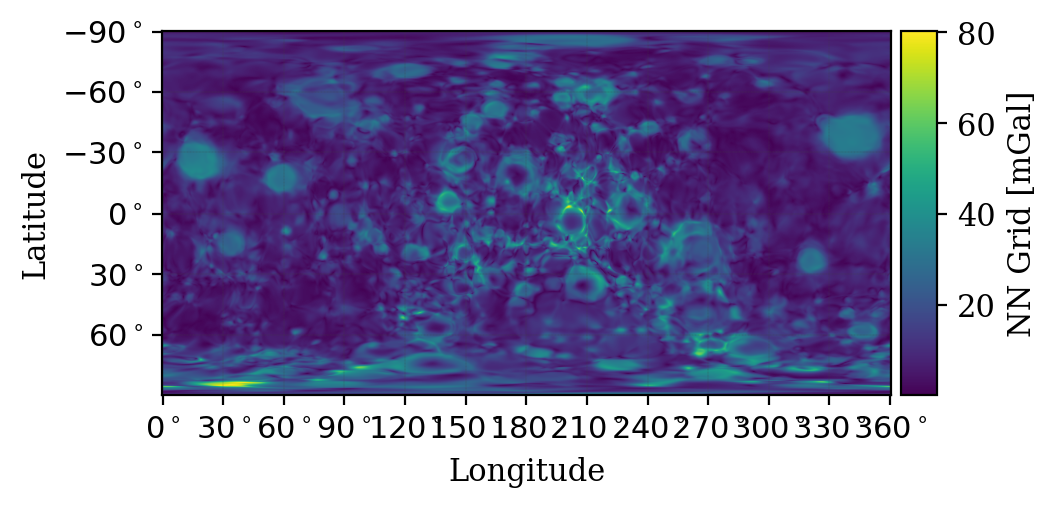

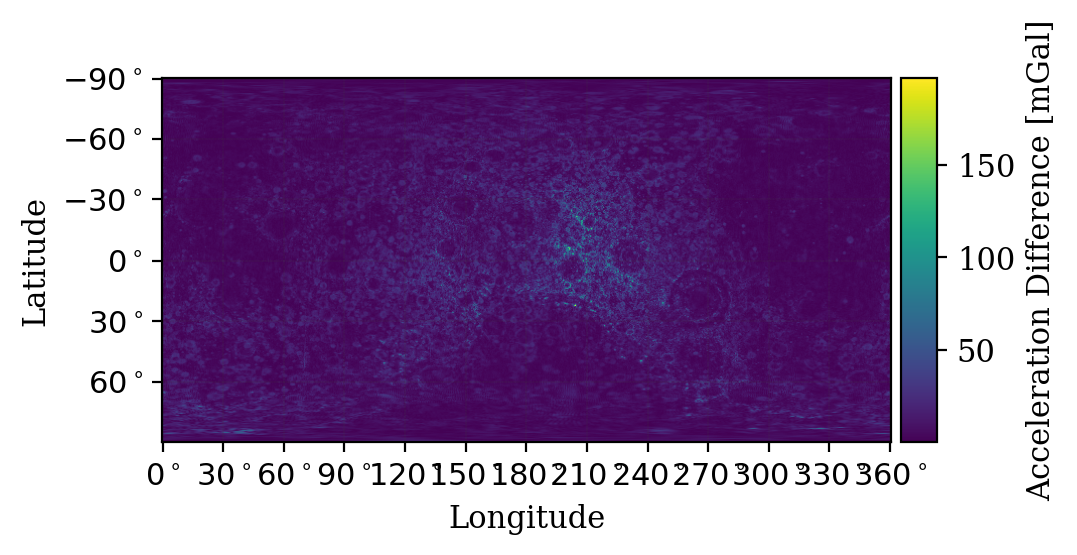

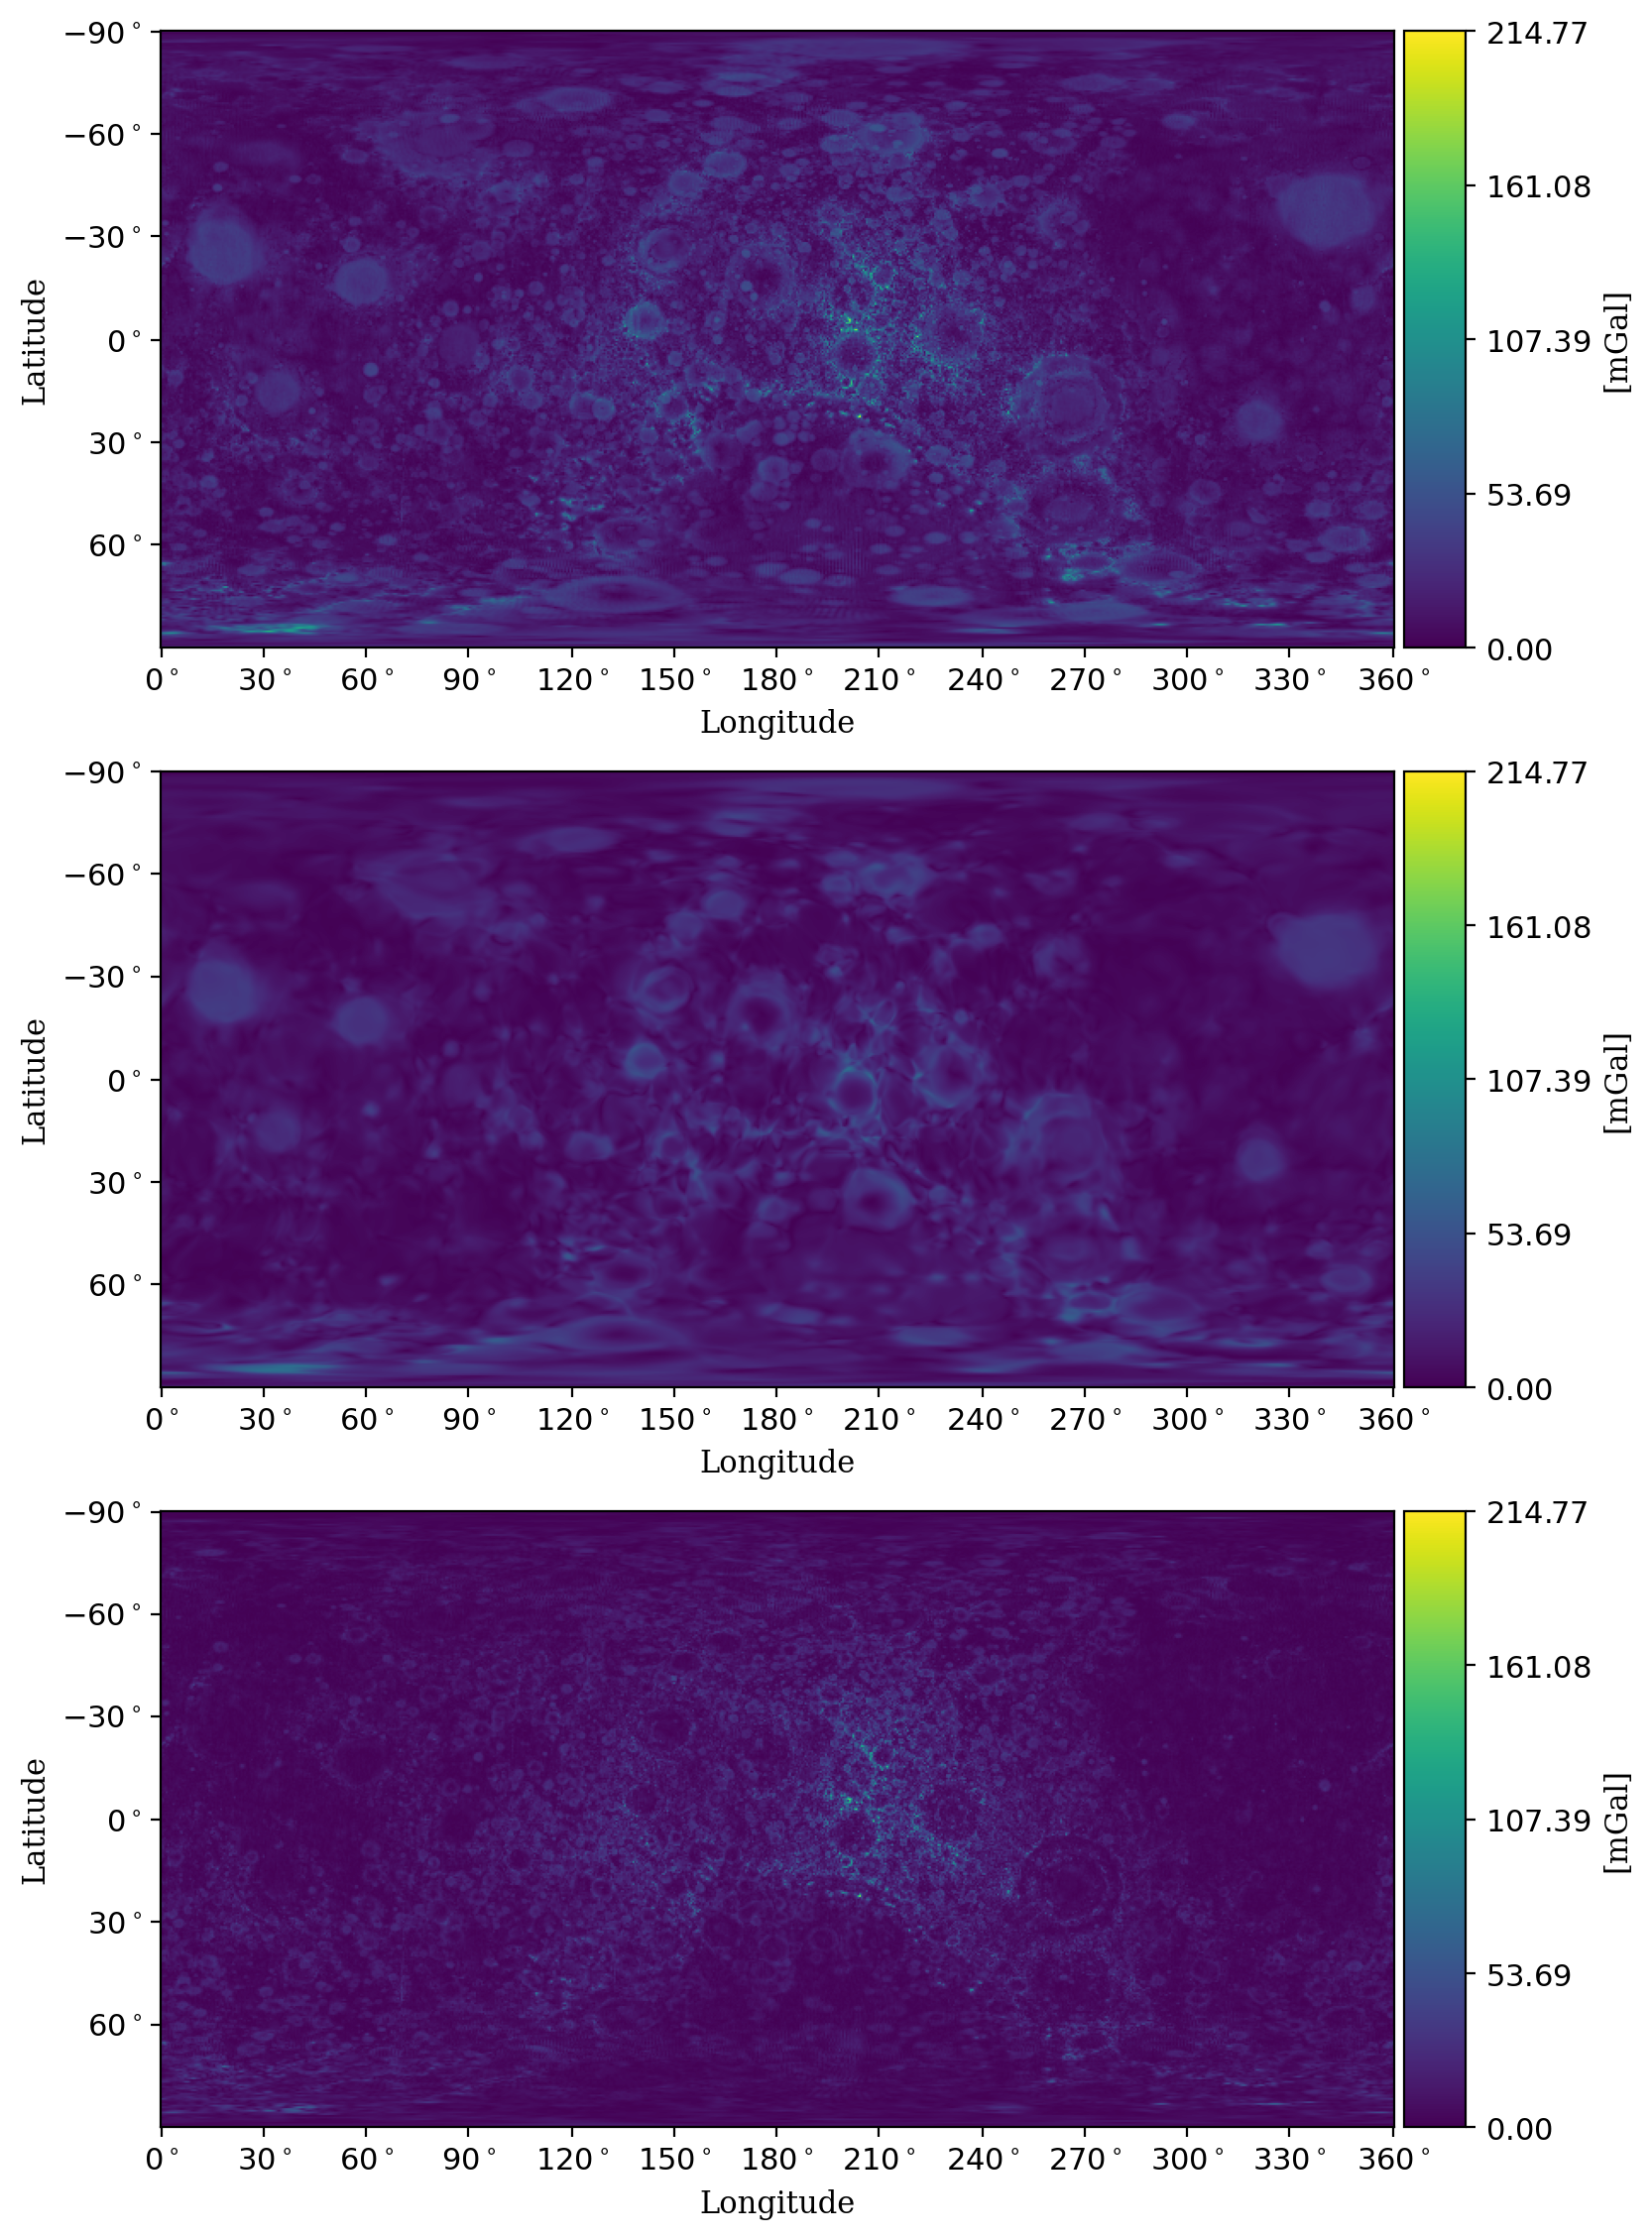

In [32]:
config['layers'] = [[3, 80, 80, 80, 80, 80, 80, 80, 80, 3]]
pipeline(df_file, config)

In [36]:
config['planet'][0].radius

1738100.0